In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq.float())  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [3]:
INPUT_SIZE = 561
INPUT_SIZE = 28
HIDDEN_SIZE = 8

# InDiD

In [4]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.25)

cpd_model = models.CPD_model(model=base_model_cpd, T=5,
                             loss_type='CPD', experiment_type='human_activity', 
                             lr=0.001, batch_size=128)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [5]:
experiment_name = 'ha'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [6]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

In [7]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | CPDLoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 61.847


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 10.048 >= min_delta = 0.01. New best score: 51.800


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.868 >= min_delta = 0.01. New best score: 46.931


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.170 >= min_delta = 0.01. New best score: 44.761


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.086 >= min_delta = 0.01. New best score: 43.675


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.656 >= min_delta = 0.01. New best score: 43.019


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.434 >= min_delta = 0.01. New best score: 42.585


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.301 >= min_delta = 0.01. New best score: 42.284


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.220 >= min_delta = 0.01. New best score: 42.064


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.168 >= min_delta = 0.01. New best score: 41.896


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.136 >= min_delta = 0.01. New best score: 41.760


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.118 >= min_delta = 0.01. New best score: 41.642


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.123 >= min_delta = 0.01. New best score: 41.520


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.169 >= min_delta = 0.01. New best score: 41.350


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.213 >= min_delta = 0.01. New best score: 41.137


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.259 >= min_delta = 0.01. New best score: 40.878


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.118 >= min_delta = 0.01. New best score: 40.760


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.449 >= min_delta = 0.01. New best score: 40.311


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.273 >= min_delta = 0.01. New best score: 40.038


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.612 >= min_delta = 0.01. New best score: 39.425


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.224 >= min_delta = 0.01. New best score: 39.201


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.301 >= min_delta = 0.01. New best score: 38.900


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.546 >= min_delta = 0.01. New best score: 38.354


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.541 >= min_delta = 0.01. New best score: 37.814


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.373 >= min_delta = 0.01. New best score: 37.441


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.400 >= min_delta = 0.01. New best score: 37.040


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.445 >= min_delta = 0.01. New best score: 36.596


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.304 >= min_delta = 0.01. New best score: 36.291


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.699 >= min_delta = 0.01. New best score: 35.593


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.276 >= min_delta = 0.01. New best score: 35.317


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.604 >= min_delta = 0.01. New best score: 34.713


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.290 >= min_delta = 0.01. New best score: 34.423


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.799 >= min_delta = 0.01. New best score: 33.624


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.269 >= min_delta = 0.01. New best score: 33.354


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.306 >= min_delta = 0.01. New best score: 33.048


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.274 >= min_delta = 0.01. New best score: 32.774


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.148 >= min_delta = 0.01. New best score: 32.626


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.103 >= min_delta = 0.01. New best score: 32.523


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.447 >= min_delta = 0.01. New best score: 32.076


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.051 >= min_delta = 0.01. New best score: 32.025


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.094 >= min_delta = 0.01. New best score: 31.931


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.297 >= min_delta = 0.01. New best score: 31.634


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.109 >= min_delta = 0.01. New best score: 31.525


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.090 >= min_delta = 0.01. New best score: 31.435


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.123 >= min_delta = 0.01. New best score: 31.311


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.130 >= min_delta = 0.01. New best score: 31.181


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.121 >= min_delta = 0.01. New best score: 31.060


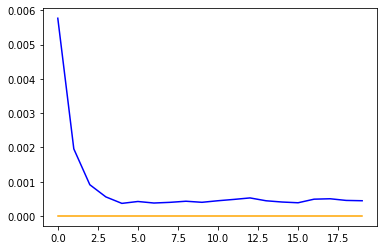

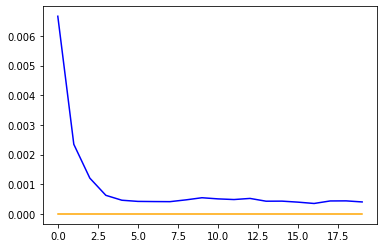

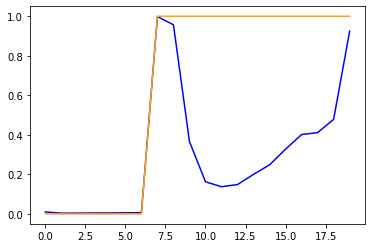

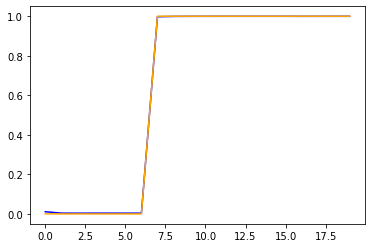

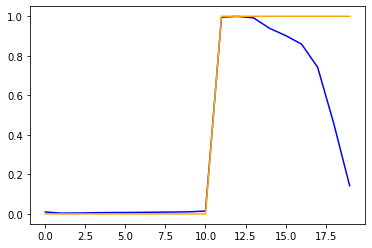

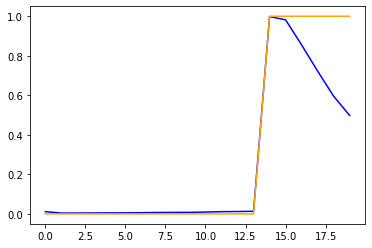

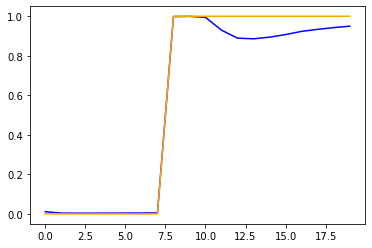

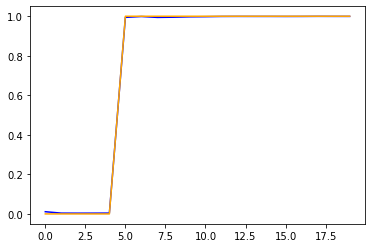

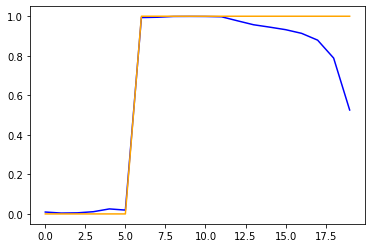

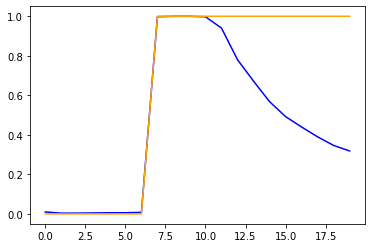

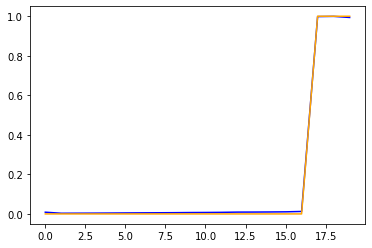

In [8]:
for batch, labels in cpd_model.val_dataloader():
    inp = batch[0]
    pred = cpd_model(inp.unsqueeze(0).float()).squeeze()
    plt.figure()
    plt.plot(pred.detach().cpu().numpy(), label='pred', color='blue')
    plt.plot(labels[0].detach().numpy(), label='true', color='orange')
    

# BCE model

In [9]:
base_model_bce = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=None,
                             loss_type='BCE', experiment_type='human_activity', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [10]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [11]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.129


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.114


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.102


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.090


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.078


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.067


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.067. Signaling Trainer to stop.


# Combined

In [12]:
base_model_comb = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.25)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='human_activity', 
                                    lr=0.001, batch_size=128)

combined_model_2 = models.CPD_model(model=base_model_comb, T=5,
                                    loss_type='CPD', experiment_type='human_activity', 
                                    lr=0.001, batch_size=128)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [13]:
experiment_name = 'ha'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

early_stop_callback_2 = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)


trainer_1 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback_2])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [14]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.683


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.038 >= min_delta = 0.01. New best score: 0.645


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.077 >= min_delta = 0.01. New best score: 0.568


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.083 >= min_delta = 0.01. New best score: 0.485


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.095 >= min_delta = 0.01. New best score: 0.390


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.050 >= min_delta = 0.01. New best score: 0.340


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.047 >= min_delta = 0.01. New best score: 0.293


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.034 >= min_delta = 0.01. New best score: 0.259


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.034 >= min_delta = 0.01. New best score: 0.224


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.204


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.194


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.026 >= min_delta = 0.01. New best score: 0.168


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.145


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.129


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.113


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.102


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.091


Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | CPDLoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 40.150


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.107 >= min_delta = 0.01. New best score: 39.043


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.973 >= min_delta = 0.01. New best score: 38.071


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.734 >= min_delta = 0.01. New best score: 37.336


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.607 >= min_delta = 0.01. New best score: 36.729


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.664 >= min_delta = 0.01. New best score: 36.065


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.675 >= min_delta = 0.01. New best score: 35.390


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.623 >= min_delta = 0.01. New best score: 34.767


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.595 >= min_delta = 0.01. New best score: 34.172


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.423 >= min_delta = 0.01. New best score: 33.749


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.354 >= min_delta = 0.01. New best score: 33.396


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.358 >= min_delta = 0.01. New best score: 33.038


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.227 >= min_delta = 0.01. New best score: 32.811


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.319 >= min_delta = 0.01. New best score: 32.492


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.153 >= min_delta = 0.01. New best score: 32.339


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.315 >= min_delta = 0.01. New best score: 32.024


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.068 >= min_delta = 0.01. New best score: 31.956


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.268 >= min_delta = 0.01. New best score: 31.688


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.077 >= min_delta = 0.01. New best score: 31.611


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.035 >= min_delta = 0.01. New best score: 31.576


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.280 >= min_delta = 0.01. New best score: 31.295


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: 31.268


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.237 >= min_delta = 0.01. New best score: 31.031


Validating: 0it [00:00, ?it/s]

# Baselines

In [21]:
import ruptures as rpt
l2_model = models.L2Baseline(l2_type="one_by_one", device='cuda')   
zero_model = models.ZeroBaseline(device='cuda')    
binseg_model = models.ClassicBaseline(rpt.Binseg(), n_pred=1, pen=None)
pelt_model = models.ClassicBaseline(rpt.Pelt(), n_pred=None, pen=1.1)
kernel_model = models.ClassicBaseline(rpt.KernelCPD(kernel="rbf"), n_pred=1)

# Calculate metrics

In [22]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [24]:
_, delay_list_cpd, fp_delay_list_cpd = metrics.evaluation_pipeline(cpd_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 45.2193
Time to FA 11.2745, delay detection 0.285 for best-cover threshold: 0.8977
TP 1147, TN 172, FP 3, FN 15 for best-cover threshold: 0.8977
Max COVER 0.9927: for threshold 0.8977
Max F1 0.9944: for threshold 0.7795
F1 0.9922: for best-cover threshold 0.8977
Max F1_ruptures (M=5) 1.0: for threshold 0.9468
F1_ruptures 0.9974: for best-cover threshold 0.8977


In [25]:
_, delay_list_bce, fp_delay_list_bce = metrics.evaluation_pipeline(bce_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 45.2193
Time to FA 11.2745, delay detection 0.285 for best-cover threshold: 0.8977
TP 1147, TN 172, FP 3, FN 15 for best-cover threshold: 0.8977
Max COVER 0.9927: for threshold 0.8977
Max F1 0.9944: for threshold 0.7795
F1 0.9922: for best-cover threshold 0.8977
Max F1_ruptures (M=5) 1.0: for threshold 0.9468
F1_ruptures 0.9974: for best-cover threshold 0.8977


In [26]:
_, delay_list_comb, fp_delay_list_comb = metrics.evaluation_pipeline(combined_model_2, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)


AUC: 40.0066
Time to FA 11.445, delay detection 0.4323 for best-cover threshold: 0.9638
TP 1127, TN 171, FP 6, FN 33 for best-cover threshold: 0.9638
Max COVER 0.9934: for threshold 0.9638
Max F1 0.9865: for threshold 0.9148
F1 0.983: for best-cover threshold 0.9638
Max F1_ruptures (M=5) 1.0: for threshold 0.9851
F1_ruptures 0.9956: for best-cover threshold 0.9638


In [27]:
_, delay_list_l2, fp_delay_list_l2 = metrics.evaluation_pipeline(l2_model, cpd_model.val_dataloader(), threshold_list, device='cuda', verbose=True)

AUC: 49.9031
Time to FA 9.187, delay detection 0.2872 for best-cover threshold: 0.7024
TP 1130, TN 0, FP 207, FN 0 for best-cover threshold: 0.7024
Max COVER 0.873: for threshold 0.7024
Max F1 0.9222: for threshold 0.9756
F1 0.9161: for best-cover threshold 0.7024
Max F1_ruptures (M=5) 0.9623: for threshold 0.6354
F1_ruptures 0.9579: for best-cover threshold 0.7024


In [33]:
_, delay_list_zero, fp_delay_list_zero = metrics.evaluation_pipeline(zero_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 20.0, delay detection 8.9028 for best-cover threshold: 0.5
TP 0, TN 172, FP 0, FN 1165 for best-cover threshold: 0.5
Max COVER 0.5728: for threshold 0.5
Max F1 0.0: for threshold 0.5
F1 0.0: for best-cover threshold 0.5
Max F1_ruptures (M=5) nan: for threshold 0.5
F1_ruptures nan: for best-cover threshold 0.5


In [29]:
 _, delay_list_binseg, fp_delay_list_binseg = metrics.evaluation_pipeline(binseg_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 9.0352, delay detection 1.3463 for best-cover threshold: 0.5
TP 843, TN 0, FP 494, FN 0 for best-cover threshold: 0.5
Max COVER 0.7781: for threshold 0.5
Max F1 0.7734: for threshold 0.5
F1 0.7734: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.9202: for threshold 0.5
F1_ruptures 0.9202: for best-cover threshold 0.5


In [30]:
_, delay_list_pelt, fp_delay_list_pelt = metrics.evaluation_pipeline(pelt_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 10.0456, delay detection 1.0434 for best-cover threshold: 0.5
TP 485, TN 157, FP 613, FN 82 for best-cover threshold: 0.5
Max COVER 0.8279: for threshold 0.5
Max F1 0.5826: for threshold 0.5
F1 0.5826: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.9228: for threshold 0.5
F1_ruptures 0.9228: for best-cover threshold 0.5


In [31]:
_, delay_list_kernel, fp_delay_list_kernel = metrics.evaluation_pipeline(kernel_model, cpd_model.val_dataloader(), [0.5], device='cuda', verbose=True)

AUC: 0.0
Time to FA 9.1728, delay detection 0.8714 for best-cover threshold: 0.5
TP 1039, TN 0, FP 298, FN 0 for best-cover threshold: 0.5
Max COVER 0.8493: for threshold 0.5
Max F1 0.8746: for threshold 0.5
F1 0.8746: for best-cover threshold 0.5
Max F1_ruptures (M=5) 0.9159: for threshold 0.5
F1_ruptures 0.9159: for best-cover threshold 0.5


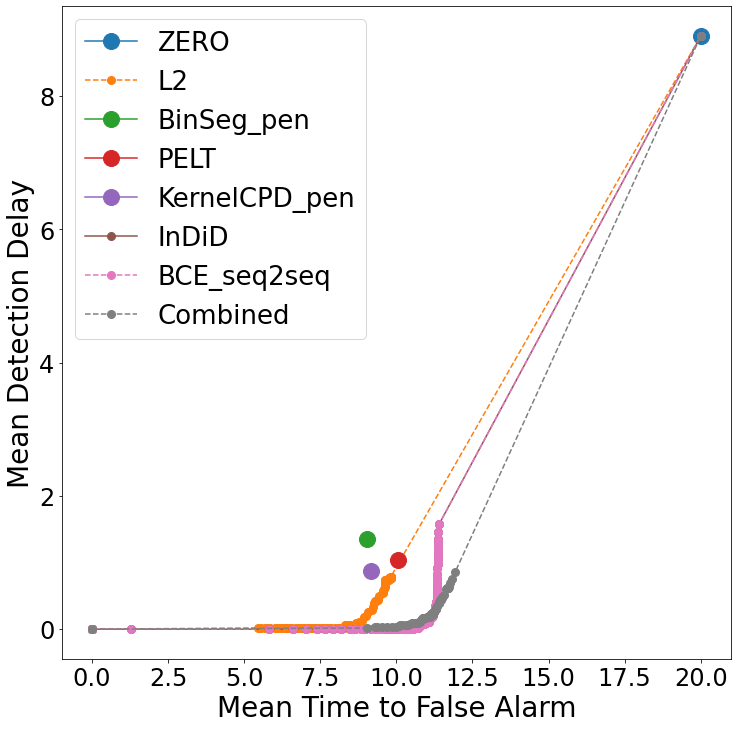

In [32]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_zero, delay_list_zero, '-o', markersize=16, label='ZERO')
plt.plot(fp_delay_list_l2, delay_list_l2, '--o', markersize=8, label='L2')
plt.plot(fp_delay_list_binseg, delay_list_binseg, '-o', markersize=16, label='BinSeg')
plt.plot(fp_delay_list_pelt, delay_list_pelt, '-o', markersize=16, label='PELT')
plt.plot(fp_delay_list_kernel, delay_list_kernel, '-o', markersize=16, label='KernelCPD')
plt.plot(fp_delay_list_cpd, delay_list_cpd, '-o', markersize=8, label='InDiD')
plt.plot(fp_delay_list_bce, delay_list_bce, '--o', markersize=8, label='BCE_seq2seq')
plt.plot(fp_delay_list_comb, delay_list_comb, '--o', markersize=8, label='Combined')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);